# Các mẫu thiết kế GOF : State

**Bs. Lê Ngọc Khả Nhi**

# Giới thiệu

Trong bài này, Nhi sẽ minh họa về mẫu thiết kế State, một trong 23 mẫu thiết kế GOF.

State (trạng thái) là một mẫu thiết kế thuộc nhóm "Hành vi", nó cho phép mô phỏng hoạt động của một hệ thống có khả năng chuyển đổi giữa một số trạng thái nhất định, và có hành vi thay đổi tùy thuộc vào mỗi trạng thái. 

Ta có thể hình dung về một cái máy nghe nhạc bỏ túi chỉ có 1 nút bấm (method) duy nhất. Hành vi của nút bấm này tùy thuộc trạng thái của cái máy. Khi máy đang tắt (trạng thái bất hoạt), bấm nút này lâu hơn 3 giây sẽ khởi động máy, cho phép chọn bài nhạc trên màn hình cảm ứng. Khi máy đang chơi nhạc (trạng thái Play), bấm nút này sẽ tạm dừng (Pause), bấm lần nữa, sẽ chơi tiếp, bấm lâu hơn 3 giây sẽ tắt máy...

Cụ thể hơn, Nhi sẽ dùng thí dụ minh họa tình huống lâm sàng, mô phỏng một phác đồ điều trị như sau: Ta có một đối tượng bệnh nhân A đang được can thiệp hóa trị liệu cho bệnh lý X. Bệnh nhân có thể ở trong 2 trạng thái : (1) Được làm xét nghiệm định lượng một biomarker X (Lab_test) và (2) Được xử trí bởi bác sĩ điều trị (Treatment), và 2 trạng thái này nối tiếp nhau:

Trong trạng thái Xét nghiệm, nồng độ của marker X sẽ được định lượng và ghi vào nhật ký theo dõi. Lần đầu tiên nhập viện (trước khi điều trị), giá trị marker thường cao, sau đó dưới tác dụng của liều hóa trị (dose), marker sẽ giảm dần theo quy luật 1 hàm mũ âm theo thời gian. Khi marker = 0 mUI/mL, khoa xét nghiệm sẽ chấm dứt theo dõi. Sau khi xét nghiệm, trạng thái bệnh nhân chuyển thành Treatment.

Trong trạng thái Treatment, bệnh nhân được 1 bác sĩ điều trị đọc kết quả xét nghiệm và ước tính đáp ứng điều trị tương đối (% so với giá trị baseline). Nếu đó là lần khám đầu tiên, bác sĩ sẽ dùng 1 liều hóa trị dose = 0.01 mg.
Nếu đáp ứng điều trị sau tuần thứ 3 không đạt -50%, bác sĩ sẽ dùng thêm liều thứ 2 hoặc thứ 3 với dose tăng lên gấp đôi (0.02 rồi 0.04 mg). Nếu đáp ứng điều trị đạt, bác sĩ chỉ định tiếp tục theo dõi. Nếu đáp ứng điều trị cao hơn 95%, bệnh nhân xem như khỏi bệnh và quy trình theo dõi/hóa trị chấm dứt.

Cơ chế của mẫu thiết kế State đó là thay vì trình bày tất cả những method xét nghiệm (test) và quyết định lâm sàng (make_decision) ngay bên trong class Clinical_Context, ta sẽ tạo riêng 2 class tương ứng với 2 trạng thái là Lab_test và Treatment, sau đó trích xuất method test vào class Lab_test, method make_decision vào class Treatment, sau đó ta sẽ dẫn nguồn để gọi chúng từ mỗi trạng thái bên trong Clinical_Context bằng 1 method chung duy nhất, thí dụ request().


# Cách thức triển khai

(1) Phân tích chương trình để xem có khả năng tách biệt 2 bộ phận: (1) đối tượng chính (context) và (2) những trạng thái khác nhau.

(2) Tạo hình mẫu cho class Trạng thái (State_interface)

(3) Tạo những class trạng thái A,B,C... khác nhau như subclass của State_interface

(4) Tạo các method để xử trí công việc chuyên biệt cho mỗi class A,B,C (mỗi trạng thái có thể có 1 hay nhiều method, các method này có thể làm thay đổi nội dung các thuộc tính (fields, attribute) của class Context

(5) Dẫn nguồn các class trạng thái A,B,C về bên trong class Context, theo trình tự tùy chọn. Tạo method để có thể gọi tuần tự, hay chuyển đổi từ trạng thái này sang trạng thái khác. Thường chỉ có 1 method duy nhất, thí dụ handle, request...


# Cấu trúc module:

Sơ đồ UML của hệ thống như sau:

!['uml'](state_uml.png)

Nội dung của code nằm trong module state.py tại: https://github.com/kinokoberuji/Python-snipets/blob/master/GOF/State/state.py

In [ ]:
class IState(ABC):
    "Mẫu State"

    @staticmethod
    @abstractmethod
    def __call__():
        "Set the default method"

class Lab_test(IState):
    "Xét nghiệm định lượng Marker X"

    @staticmethod
    def test(patient: Clinical_context):
        "Xét nghiệm"

        t_i = len(patient.marker)
        if t_i == 0:
            x = float(np.random.gamma(1.5,0.5,1))
            patient.marker = x * 30
            print(style.RED + f"Xét nghiệm lần đầu tiên, kết quả = {x*30: .3f} mUI/mL")

        else:
            y0 = patient.marker[0]
            yt = patient.marker[-1]
            dif = 100*(yt - y0)/y0

            if dif <= -99.99:
                print(style.RESET + "Kết quả xét nghiệm đã âm tính, kết thúc theo dõi")
                patient.treated = True
            else:
                ke = patient.clearance
                y0 = patient.marker[0]
                x = response(y0 = y0, t = t_i, ke = ke)
                patient.marker = x
                print(style.BLUE + f"Xét nghiệm lần {t_i + 1}, kết quả = {x: .3f} mUI/mL")
        
        print("Trả kết quả xét nghiệm cho bác sĩ điều trị")

    __call__ = test

class Treatment(IState):
    "Quyết định lâm sàng"

    @staticmethod
    def make_decision(patient: Clinical_context):
        "Can thiệp tùy theo kết quả CLS"

        t_i = len(patient.marker)
        y0 = patient.marker[0]
        yt = patient.marker[-1]
        ke = patient.clearance
        t = len(patient.marker)
        dose = patient.dose
        dif = 100*(yt - y0)/y0

        if t_i == 1:
            patient.dose += 0.01
            print(f"Bắt đầu hóa trị, liều {dose:.2f} mg")
        
        if dif< -95.0:
            print(style.RESET + "Chấm dứt điều trị, bệnh nhân đã khỏi bệnh")
            patient.treated = True
        
        else:
            print(style.GREEN + f"Đáp ứng điều trị tuần thứ {t_i} = {dif:.3f} %, tiếp tục theo dõi")

            if (dif > -50) & (t_i >= 3):
                print(style.RED + "Bệnh nhân không đáp ứng liều thấp, tăng liều gấp đôi")
                patient.dose *= 2
        
        ke -= patient.dose * 0.85
        patient.clearance = ke

    __call__ = make_decision

In [ ]:
@dataclass
class Clinical_context():
    """Tình huống lâm sàng của một bệnh nhân"""

    _marker: List[float] = field(default_factory=list)
    _clearance: float = -0.1
    _dose: float = 0.01
    treated: bool = False

    _state_handles = [Lab_test(),
                      Treatment()]

    _handle = iter(_state_handles)

    @property
    def marker(self):
        return self._marker

    @marker.setter
    def marker(self, level):
        self._marker.append(level)
    
    @property
    def clearance(self):
        return self._clearance
    
    @clearance.setter
    def clearance(self, Ke):
        self._clearance = Ke
    
    @property
    def dose(self):
        return self._dose
    
    @dose.setter
    def dose(self, new_dose):
        self._dose = new_dose

    def request(self):
        try:
            self._handle.__next__()(patient = self)
        except StopIteration:
            # resetting so it loops
            self._handle = iter(self._state_handles)
    
    def followup(self):

        if len(self.marker) > 2:
            ts = np.array(range(1,len(self.marker)+1))
            sns.lineplot(x = np.array(ts), 
                    y = np.array(self.marker), 
                    color = 'red')
            plt.ylabel('Biomarker X (mUI/mL)')
            plt.xlabel('Thời gian theo dõi (tuần)')
            plt.show()
        else:
            print("Chưa đủ dữ liệu !")

Sau đây ta sẽ chạy chương trình :

Đầu tiên với class Clinical_context, ta sẽ khởi tạo object PATIENT_A, đại diện cho một bệnh nhân

In [1]:
from state import *

In [4]:
PATIENT_A = Clinical_context()

PATIENT_A

Clinical_context(_marker=[], _clearance=-0.1, _dose=0.01, treated=False)

field 'treated = False' cho thấy bệnh nhân này chưa được trị hết bệnh, field marker là 1 list để ghi nhật kí theo dõi, nó rỗng cho thấy bệnh nhân chưa làm xét nghiệm lần nào, tham số clearance cho phép mô phỏng sự suy giảm của marker X bằng một hàm mũ âm theo thời gian, tham số dose cho biết liều hóa trị đầu tiên được dùng.

Tiếp theo, ta sẽ xem điều gì xảy ra khi ta chạy 1 vòng lặp while cho đến khi bệnh nhân này khỏi bệnh (treated = True):

In [5]:
PATIENT_A = Clinical_context()

while not PATIENT_A.treated :
    PATIENT_A.request()

Xét nghiệm lần đầu tiên, kết quả =  19.319 mUI/mL
Trả kết quả xét nghiệm cho bác sĩ điều trị
Bắt đầu hóa trị, liều 0.01 mg
Đáp ứng điều trị tuần thứ 1 = 0.000 %, tiếp tục theo dõi
Xét nghiệm lần 2, kết quả =  16.962 mUI/mL
Trả kết quả xét nghiệm cho bác sĩ điều trị
Đáp ứng điều trị tuần thứ 2 = -12.202 %, tiếp tục theo dõi
Xét nghiệm lần 3, kết quả =  14.582 mUI/mL
Trả kết quả xét nghiệm cho bác sĩ điều trị
Đáp ứng điều trị tuần thứ 3 = -24.520 %, tiếp tục theo dõi
Bệnh nhân không đáp ứng liều thấp, tăng liều gấp đôi
Xét nghiệm lần 4, kết quả =  11.513 mUI/mL
Trả kết quả xét nghiệm cho bác sĩ điều trị
Đáp ứng điều trị tuần thứ 4 = -40.407 %, tiếp tục theo dõi
Bệnh nhân không đáp ứng liều thấp, tăng liều gấp đôi
Xét nghiệm lần 5, kết quả =  7.408 mUI/mL
Trả kết quả xét nghiệm cho bác sĩ điều trị
Đáp ứng điều trị tuần thứ 5 = -61.653 %, tiếp tục theo dõi
Xét nghiệm lần 6, kết quả =  4.157 mUI/mL
Trả kết quả xét nghiệm cho bác sĩ điều trị
Đáp ứng điều trị tuần thứ 6 = -78.484 %, tiếp tục 

Như vậy, sau 8 tuần hóa trị, giá trị marker đã giảm từ 19.3 mUI/mL còn 0.859 mUI/mL, hay 89.491% so với ban đầu, và ở tuần thứ 9 kết quả này xem như âm tính, bệnh nhân được xem là đã khỏi bệnh.

Method followup cho phép vẽ biểu đồ theo dõi diễn tiến của marker X trong 8 tuần:

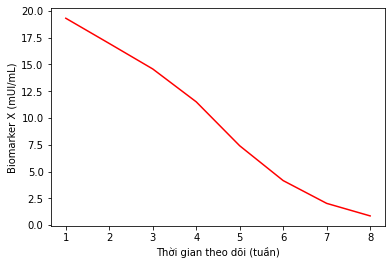

In [6]:
PATIENT_A.followup()

# Nhận xét

Mẫu thiết kế State rất đơn giản về kỹ thuật, nhưng rất hữu dụng và thường được dùng như một chiến thuật để tái cấu trúc (refactoring) nội dung code.

Ưu điểm của cách làm này gồm: phù hợp với tiêu chí trách nhiệm tối giản: mỗi class chỉ có 1 vai trò, 1 trách nhiệm, mỗi method chỉ làm 1 việc.

Việc tách biệt các state và độc lập với context cho phép thêm những state mới một cách dễ dàng mà không cần sửa code trong những state hiện hành.

Cho phép đơn giản hóa nội dung code trong class context, cho phép loại bỏ cấu trúc if, then, else, switch... phức tạp, làm cho code dễ hiểu hơn.

Chúc các bạn học vui và hẹn gặp lại lần sau.